In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:

# Specify the path to the CSV file
data_path = 'Womens Clothing E-Commerce Reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(data_path)


In [3]:

# Extract relevant columns for sentiment analysis and recommendation
columns_to_extract = ['Clothing ID', 'Review Text', 'Rating', 'Division Name', 'Class Name', 'Department Name']
data = df[columns_to_extract]

# Drop rows with null values in 'Review Text' and specific columns
columns_to_dropna = ['Review Text', 'Division Name', 'Class Name', 'Department Name']
data = data.dropna(subset=columns_to_dropna)

data.head()


,Clothing ID,Review Text,Rating,Division Name,Class Name,Department Name
0,767,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimates,Intimate
1,1080,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,1077,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Pants,Bottoms
4,847,This shirt is very flattering to all due to th...,5,General,Blouses,Tops


In [4]:

# Perform sentiment analysis (example: assuming ratings 4 and 5 are positive sentiment)
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x >= 4 else 0)


In [5]:


# Check unique values in 'Rating' column
print("Unique values in 'Rating' column:", data['Rating'].unique())


Unique values in 'Rating' column: [4 5 3 2 1]


In [6]:

# Preprocess the text data
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['Processed_Text'] = data['Review Text'].apply(preprocess_text)
data.head()


,Clothing ID,Review Text,Rating,Division Name,Class Name,Department Name,Sentiment,Processed_Text
0,767,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimates,Intimate,1,absolutely wonderful silky sexy comfortable
1,1080,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,1,love dress sooo pretty happened find store im ...
2,1077,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,0,high hopes dress really wanted work initially ...
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Pants,Bottoms,1,love love love jumpsuit fun flirty fabulous ev...
4,847,This shirt is very flattering to all due to th...,5,General,Blouses,Tops,1,shirt flattering due adjustable front tie perf...


In [7]:

# TF-IDF Vectorization of the processed text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Processed_Text'])


In [8]:
# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Print the vocabulary (mapping of terms to feature indices)
print("Vocabulary:")
print(tfidf_vectorizer.vocabulary_)

# Print the first few elements of the TF-IDF matrix
print("First Few Elements of TF-IDF Matrix:")
print(tfidf_matrix[:5, :])  # Adjust the indices as needed

TF-IDF Matrix Shape: (22628, 17996)
Vocabulary:
{'absolutely': 32, 'wonderful': 17673, 'silky': 13815, 'sexy': 13413, 'comfortable': 3002, 'love': 8878, 'dress': 4552, 'sooo': 14399, 'pretty': 11742, 'happened': 6798, 'store': 14812, 'im': 7379, 'glad': 6363, 'bc': 1134, 'ordered': 10555, 'online': 10447, 'petite': 11156, 'bought': 1758, 'length': 8473, 'hits': 7090, 'little': 8682, 'knee': 8131, 'definitely': 3954, 'true': 16357, 'midi': 9429, 'truly': 16362, 'high': 6986, 'hopes': 7170, 'really': 12221, 'wanted': 17175, 'work': 17709, 'initially': 7544, 'small': 14154, 'usual': 16869, 'size': 13886, 'outrageously': 10633, 'fact': 5328, 'zip': 17975, 'reordered': 12501, 'medium': 9271, 'ok': 10384, 'overall': 10656, 'half': 6730, 'fit': 5635, 'nicely': 10040, 'tight': 15943, 'layer': 8355, 'somewhat': 14388, 'cheap': 2499, 'net': 10000, 'layers': 8361, 'imo': 7401, 'major': 9040, 'design': 4063, 'flaw': 5781, 'sewn': 13406, 'directly': 4231, 'zipper': 17982, 'jumpsuit': 8020, 'fun': 6

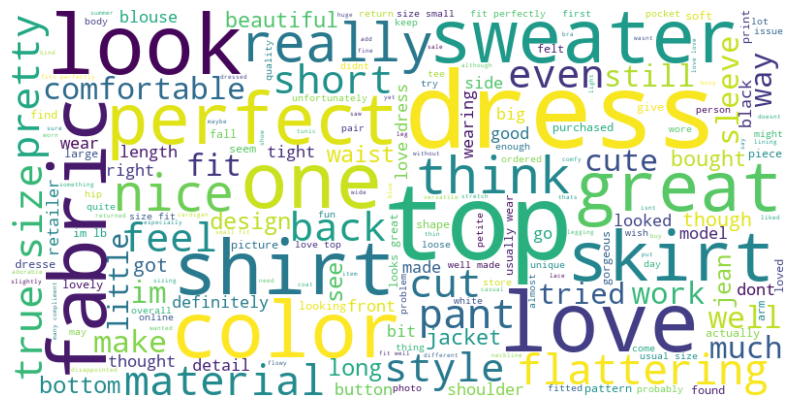

In [9]:
# Combine all processed text into a single string
all_text = ' '.join(data['Processed_Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:

# Calculate cosine similarity between documents
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [11]:
# Print the results 
print("Cosine Similarity Matrix:")
print(cosine_sim[:5, :5])  # Adjust the indices as needed

Cosine Similarity Matrix:
[[1.         0.         0.02023341 0.         0.        ]
 [0.         1.         0.0844353  0.07110977 0.04565959]
 [0.02023341 0.0844353  1.         0.         0.        ]
 [0.         0.07110977 0.         1.         0.07662248]
 [0.         0.04565959 0.         0.07662248 1.        ]]


In [12]:

# Display the range of valid Clothing IDs
min_clothing_id = data['Clothing ID'].min()
max_clothing_id = data['Clothing ID'].max()
print(f"Valid Clothing ID range: {min_clothing_id} to {max_clothing_id}")


Valid Clothing ID range: 1 to 1205


In [13]:
# Function to get recommendations based on similar clothing within the same division, class, and department
def get_recommendations(clothing_id, sentiment_threshold=0.5, min_avg_rating=4, top_n=5):
    # Check if the specified Clothing ID exists in the dataset
    if clothing_id not in data['Clothing ID'].values:
        print(f"Clothing ID {clothing_id} does not exist in the dataset.")
        return pd.DataFrame({'Clothing ID': [], 'Review Text': [], 'Rating': []})

    # Get division, class, and department for the specified Clothing ID
    division_name = data[data['Clothing ID'] == clothing_id]['Division Name'].iloc[0]
    class_name = data[data['Clothing ID'] == clothing_id]['Class Name'].iloc[0]
    department_name = data[data['Clothing ID'] == clothing_id]['Department Name'].iloc[0]


    # Filter data based on similar division, class, and department with positive sentiment
    similar_items = data[
        (data['Division Name'] == division_name) &
        (data['Class Name'] == class_name) &
        (data['Department Name'] == department_name) &
        (data['Sentiment'] >= sentiment_threshold)
    ]

    similar_items = similar_items[similar_items['Clothing ID'] != clothing_id]

    # Check if there are any similar items
    if not similar_items.empty:
        # Calculate the average rating
        avg_rating = similar_items['Rating'].mean()

        # Only proceed if the average rating is 4 or above
        if avg_rating >= min_avg_rating:
            # Calculate a combined score based on sentiment and rating (you can customize the weights)
            similar_items['Combined_Score'] = sentiment_threshold * similar_items['Sentiment'] + (1 - sentiment_threshold) * similar_items['Rating']

            # Sort by the combined score
            similar_items = similar_items.sort_values(by='Combined_Score', ascending=False)

            # Get top N recommendations
            top_recommendations = similar_items.head(top_n).drop_duplicates(subset=['Clothing ID'])

            return top_recommendations[['Clothing ID', 'Review Text', 'Rating', 'Sentiment', 'Combined_Score']]
        else:
            print(f"The average rating for similar items is below {min_avg_rating}. No recommendations.")
            return pd.DataFrame({'Clothing ID': [], 'Review Text': [], 'Rating': [], 'Sentiment': [], 'Combined_Score': []})
    else:
        print("No similar items found.")
        return pd.DataFrame({'Clothing ID': [], 'Review Text': [], 'Rating': [], 'Sentiment': [], 'Combined_Score': []})


In [14]:

# User input for clothing ID
user_input_id = int(input(f"Enter a Clothing ID within the range {min_clothing_id} to {max_clothing_id}: "))

# Example: Get recommendations based on user input
recommendations = get_recommendations(user_input_id)
if not recommendations.empty:
    print(f"Recommendations for Similar Clothing to Product {user_input_id}:\n")
    print(recommendations)
else:
    print(f"No similar clothing found for Product {user_input_id}.")


Recommendations for Similar Clothing to Product 453:

       Clothing ID                                        Review Text  Rating  \
14188          606  I love these shorts, nice material, good fitti...       5   
16686          417  True to size and love the color. great to wear...       5   
15596          579  I'm a huge skort fan from way back, but findin...       5   
16427          541  So cute! rompers are hard because they are so ...       5   

       Sentiment  Combined_Score  
14188          1             3.0  
16686          1             3.0  
15596          1             3.0  
16427          1             3.0  
